In [7]:
%matplotlib inline
import copy
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import torch
from dsets import getCandidateInfoList, getCt, LunaDataset
from util.util import xyz2irc


candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=False)
candidateInfo_list[0]

CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))

In [9]:
from vis import findPositiveSamples, showCandidate
positiveSample_list = findPositiveSamples()

2024-05-04 14:00:00,878 INFO     pid:452 dsets:269:__init__ <dsets.LunaDataset object at 0x0000017407510EB0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio


0 CandidateInfoTuple(isNodule_bool=True, diameter_mm=0.0, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.243094273518213382155770295147', center_xyz=(34.78, 55.69, -219.15))
1 CandidateInfoTuple(isNodule_bool=True, diameter_mm=22.22543938, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.286422846896797433168187085942', center_xyz=(-89.5875500717, 11.3033645407, -70.9842087538))
2 CandidateInfoTuple(isNodule_bool=True, diameter_mm=12.73358119, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.115386642382564804180764325545', center_xyz=(86.570115815, 52.86443574, -83.091436155))
3 CandidateInfoTuple(isNodule_bool=True, diameter_mm=0.0, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(58.2, 35.69, -102.08))
4 CandidateInfoTuple(isNodule_bool=True, diameter_mm=5.111033559, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.111496024928645603833332252962', center_xyz=(15.97, 83.73, -145.4))
5 CandidateInfoTuple(isNodule_bool=True, diameter_mm=0.0, series_uid='

In [10]:
augmentation_dict = {}
augmentation_list = [
    ('None', {}),
    ('flip', {'flip': True}),
    ('offset', {'offset': 0.1}),
    ('scale', {'scale': 0.2}),
    ('rotate', {'rotate': True}),
    ('noise', {'noise': 25.0}),    
]
ds_list = [
    LunaDataset(sortby_str='label_and_size', augmentation_dict=augmentation_dict) 
    for title_str, augmentation_dict in augmentation_list
]

all_dict = {}
for title_str, augmentation_dict in augmentation_list:
    all_dict.update(augmentation_dict)
all_ds = LunaDataset(sortby_str='label_and_size', augmentation_dict=all_dict)

augmentation_list.extend([('All', augmentation_dict)] * 3)
ds_list.extend([all_ds] * 3)



2024-05-04 14:00:00,981 INFO     pid:452 dsets:269:__init__ <dsets.LunaDataset object at 0x0000017407511120>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-05-04 14:00:01,053 INFO     pid:452 dsets:269:__init__ <dsets.LunaDataset object at 0x000001746C03D7E0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-05-04 14:00:01,124 INFO     pid:452 dsets:269:__init__ <dsets.LunaDataset object at 0x00000174075132E0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-05-04 14:00:01,230 INFO     pid:452 dsets:269:__init__ <dsets.LunaDataset object at 0x0000017407513280>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-05-04 14:00:01,296 INFO     pid:452 dsets:269:__init__ <dsets.LunaDataset object at 0x0000017407511FF0>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio
2024-05-04 14:00:01,366 INFO     pid:452 dsets:269:__init__ <dsets.LunaDataset object at 0x0000017407512620>: 551065 training samp

torch.Size([1, 32, 48, 48]) (tensor([0, 1]), '1.3.6.1.4.1.14519.5.2.1.6279.6001.173106154739244262091404659845', tensor([110, 355, 189]))


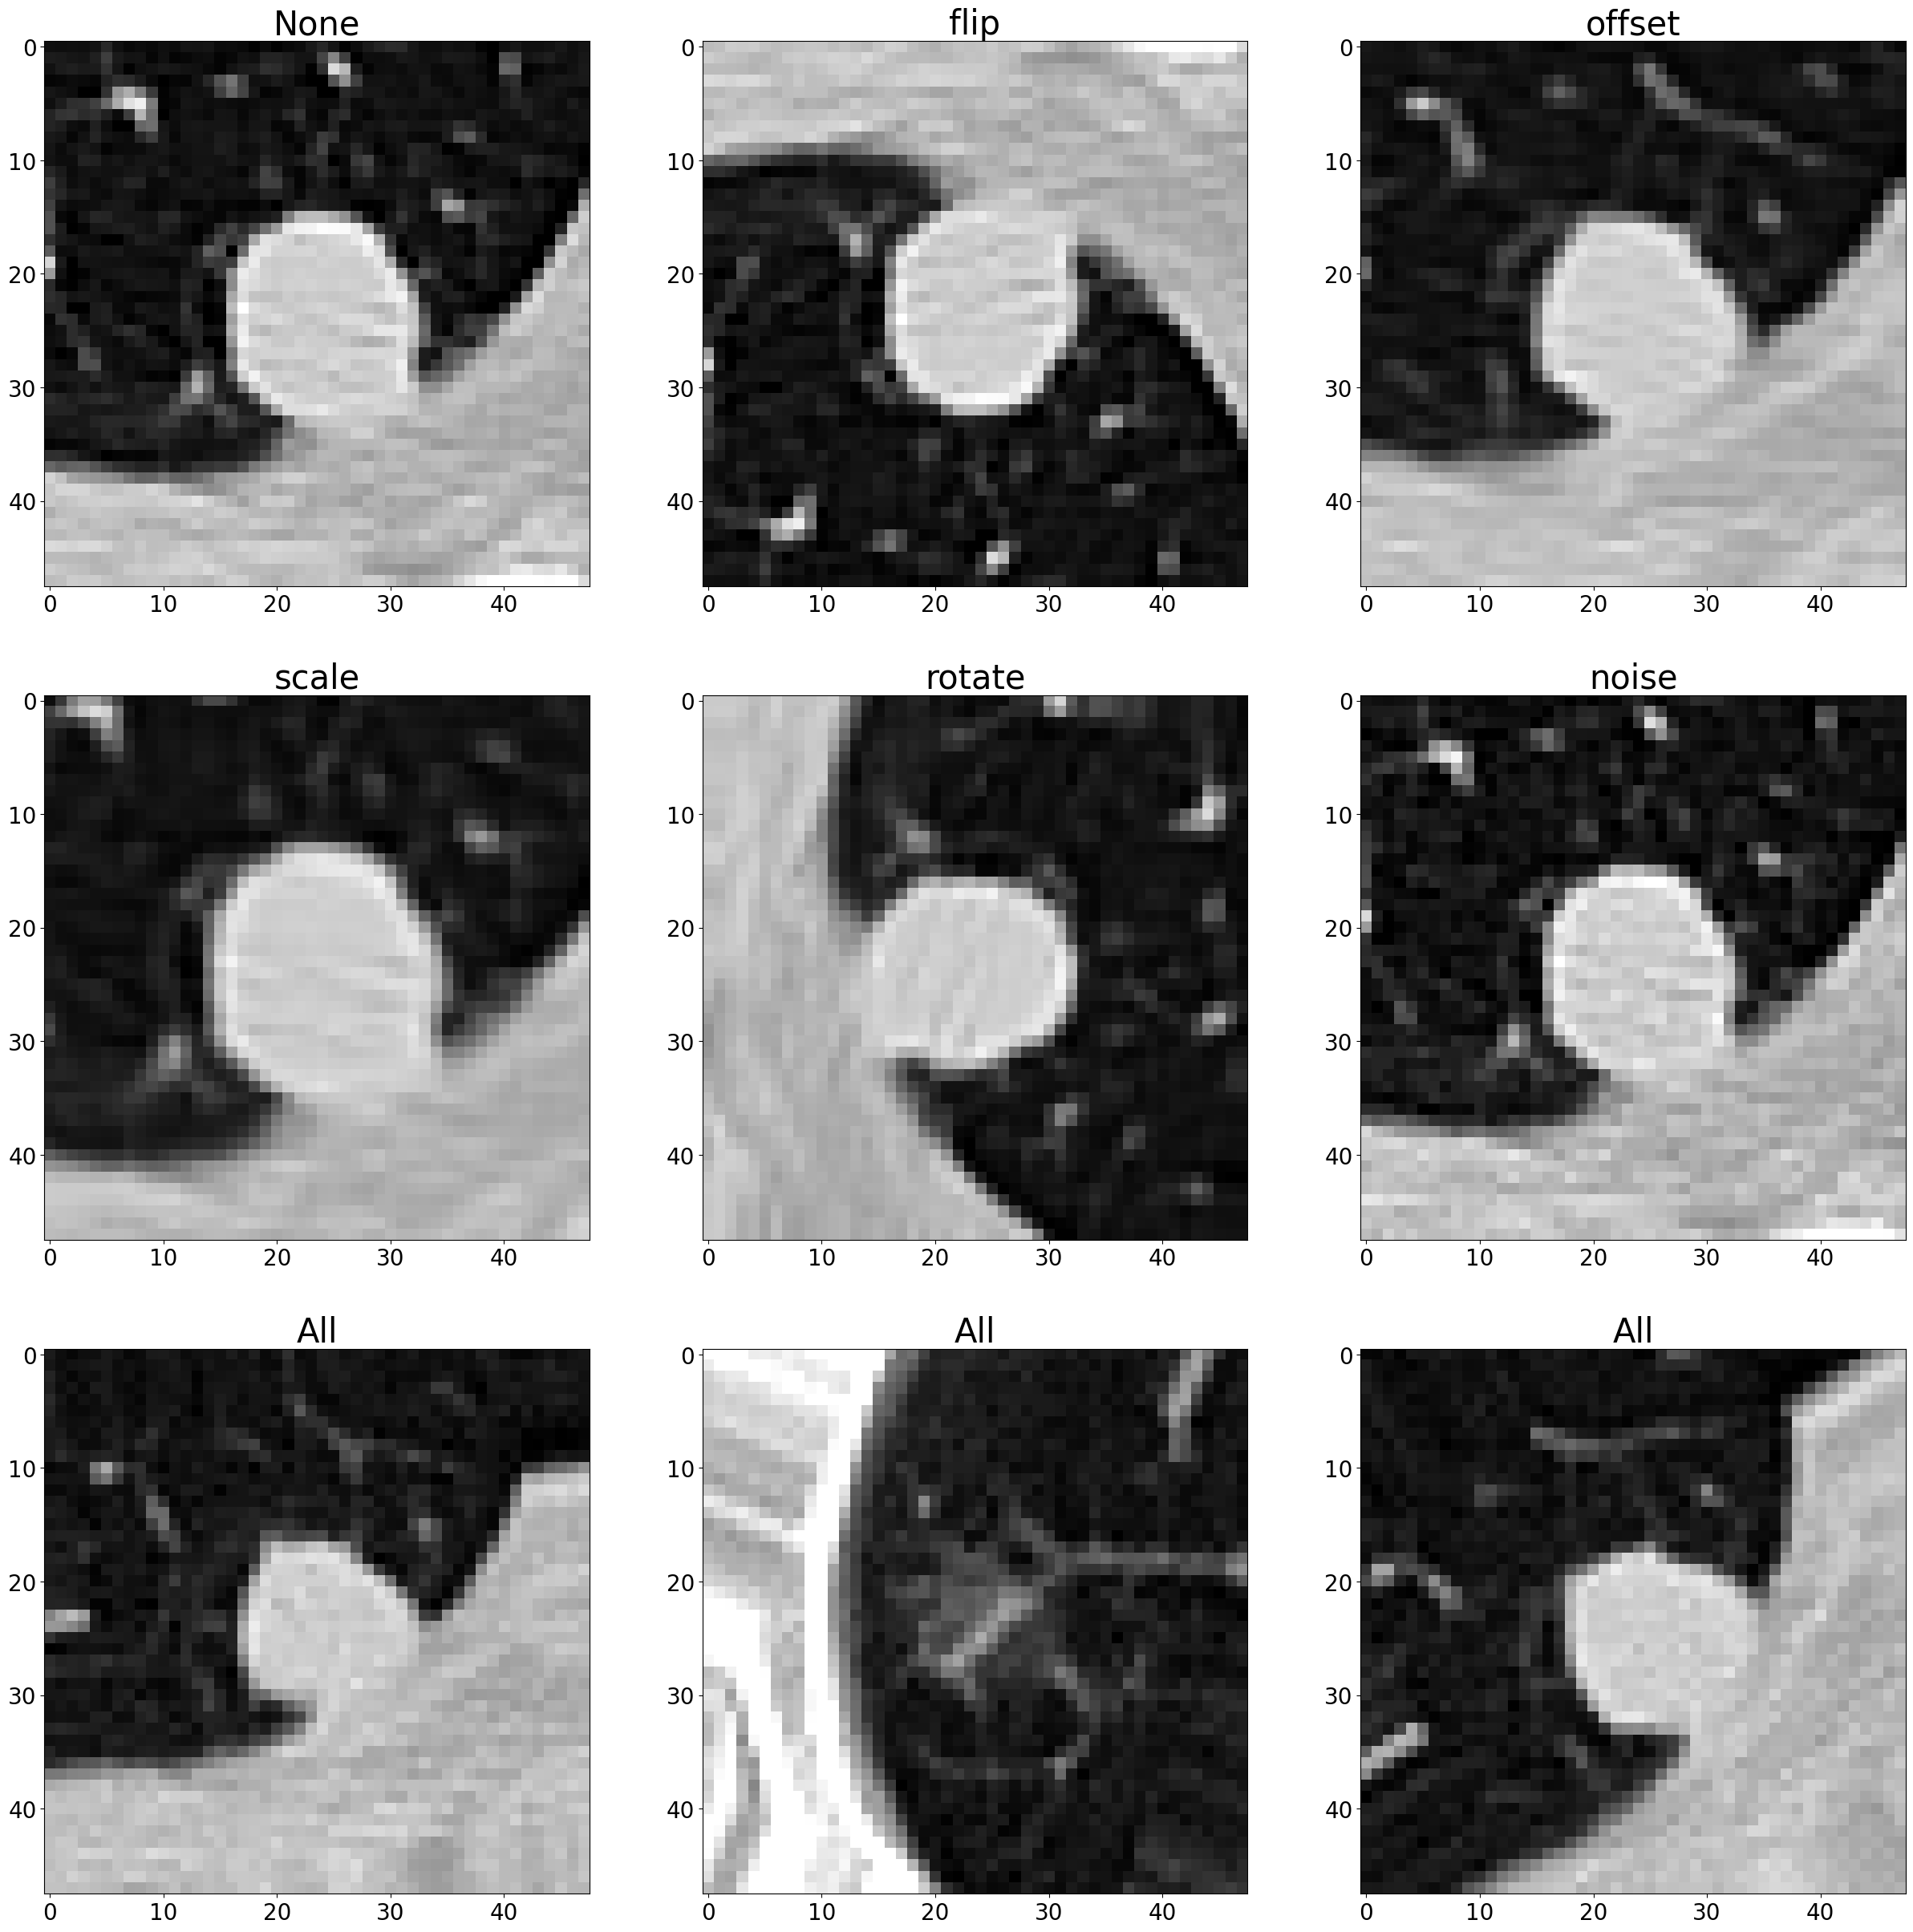

In [11]:
sample_ndx = 100
sample_ndx = 154
sample_ndx = 155


sample_tup = all_ds[sample_ndx]
print(sample_tup[0].shape, sample_tup[1:])

fig = plt.figure(figsize=(30, 30))

clim=(-1000.0, 300)

for i, ((title_str, _), ds) in enumerate(zip(augmentation_list, ds_list)):
    sample_tup = ds[sample_ndx]
    subplot = fig.add_subplot(3, 3, i+1)
    subplot.set_title(title_str, fontsize=30)
    for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
        label.set_fontsize(20)
    plt.imshow(sample_tup[0][0][16], clim=clim, cmap='gray')



2024-05-04 14:00:03,841 INFO     pid:452 dsets:269:__init__ <dsets.LunaDataset object at 0x000001740440B640>: 440 training samples, 439 neg, 1 pos, unbalanced ratio


1.3.6.1.4.1.14519.5.2.1.6279.6001.286422846896797433168187085942 238 False [238]


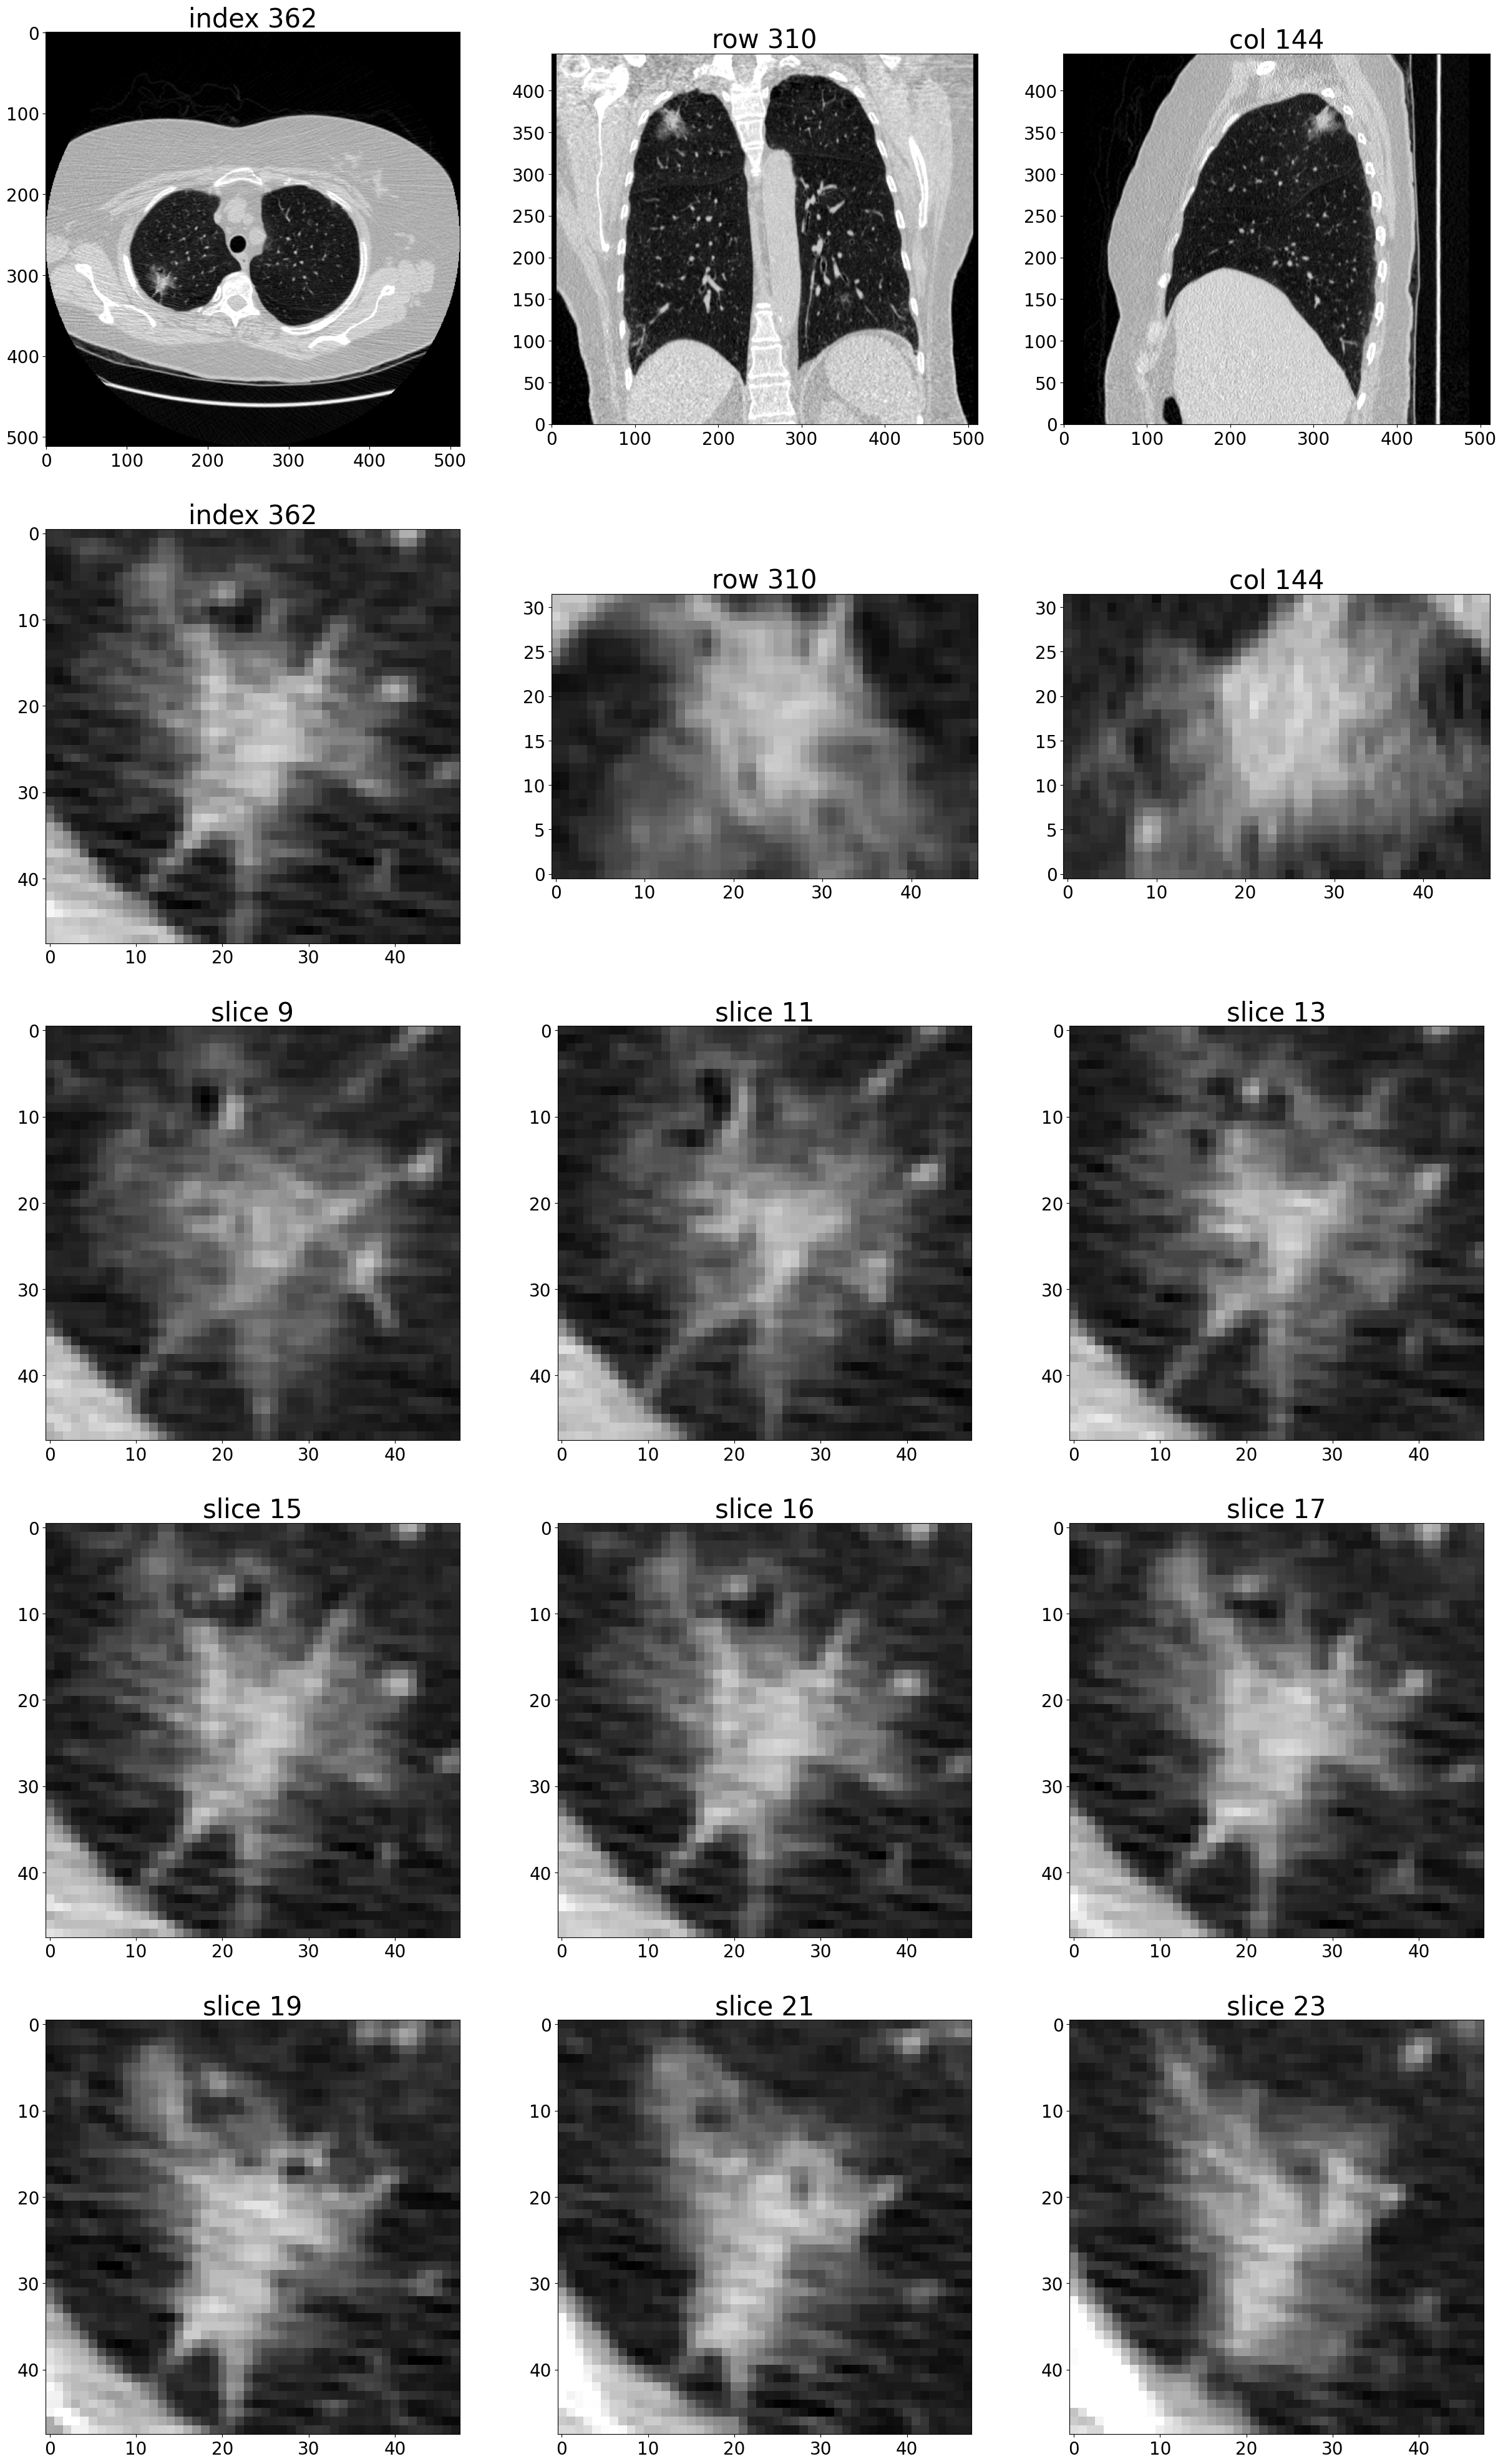

In [12]:
series_uid = positiveSample_list[1][2]
showCandidate(series_uid)